In [1]:
#Import the dataset
import pandas as pd

twitch_views = pd.read_csv('https://raw.githubusercontent.com/sonnynomnom/Codecademy-Learn-SQL-from-Scratch/master/Twitch/video_play.csv')
twitch_views.head(10)

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,NaN,NaN
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,False
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,False
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,False
5,2015-01-01 23:27:36,343fe2bfd58595d5c18602d420ecf6f9d694d5a8,7814f661a54349ff5eee84f9d6f476918c9b7270,george,US,iphone_t,DayZ,NaN,NaN
6,2015-01-01 21:09:23,80a0c7d1abb6a5a0060e18202b77bef831e08ca5,eb158cab3f606d3894a32e20bddbfd2d589095a9,frank,US,site,League of Legends,high,True
7,2015-01-01 19:14:27,1e342e5e4e228f617449029054b3bb19c5224528,2aaf6a414bc3dc923b04f986de7ba1b8101c6698,frank,CA,site,League of Legends,high,False
8,2015-01-01 13:51:04,272cffbb1a9a33ad3bb48a2ee9ae5cbcac5ca22e,401716920e3435b5e3eec9fc4ccd6a44c7af38f5,kramer,TR,site,Counter-Strike: Global Offensive,chunked,False
9,2015-01-01 22:00:14,593ed161c456eeeb9e18b8005786d42abc1a7373,ef24dc49ceb4bcd3cccb0fa862d8a150ecf935e1,frank,US,site,League of Legends,medium,False


In [2]:
#Examine the dataset (no. of rows, list of columns, any null values, any duplicated rows and column datatypes)
print(twitch_views.shape[0])
print(twitch_views.columns.tolist())
print(twitch_views['login'].isnull().values.any())
print(twitch_views.duplicated().sum())
print(twitch_views.dtypes)

526299
['time', 'device_id', 'login', 'channel', 'country', 'player', 'game', 'stream_format', 'subscriber']
False
10629
time             object
device_id        object
login            object
channel          object
country          object
player           object
game             object
stream_format    object
subscriber       object
dtype: object


In [3]:
# Remove duplicated rows
twitch_views = twitch_views.drop_duplicates()
print(twitch_views.shape[0])
print(twitch_views.duplicated().sum())

515670
0


In [4]:
# We aim to plot a barchart to visualise viewership by game.
# First, analyse breakdown of data by game
twitch_views.game.value_counts()

League of Legends                   189416
Dota 2                               84180
Counter-Strike: Global Offensive     53408
DayZ                                 36888
Heroes of the Storm                  34954
The Binding of Isaac: Rebirth        28539
Gaming Talk Shows                    27879
World of Tanks                       15820
Hearthstone: Heroes of Warcraft      14083
Agar.io                              11298
Rocket League                         6903
ARK: Survival Evolved                 3828
SpeedRunners                          3282
Duck Game                             1037
Fallout 3                              461
Devil May Cry 4: Special Edition       227
Breaking Point                         145
Batman: Arkham Knight                  103
Reign Of Kings                          47
The Witcher 3: Wild Hunt                41
Block N Load                            29
Depth                                   27
Mortal Kombat X                         21
Super Mario

In [5]:
# League of Legends is clearly very popular
# We perform groupby on the data by 'game' and clean it
twitch_views_by_game = twitch_views.groupby('game').login.count().reset_index()
twitch_views_by_game.sort_values('login', ascending=False, inplace=True)
twitch_views_by_game.rename(columns={'login': 'view_count'}, inplace=True)
print(twitch_views_by_game)

                                game  view_count
23                 League of Legends      189416
14                            Dota 2       84180
10  Counter-Strike: Global Offensive       53408
11                              DayZ       36888
22               Heroes of the Storm       34954
34     The Binding of Isaac: Rebirth       28539
17                 Gaming Talk Shows       27879
39                    World of Tanks       15820
20   Hearthstone: Heroes of Warcraft       14083
1                            Agar.io       11298
29                     Rocket League        6903
0              ARK: Survival Evolved        3828
31                      SpeedRunners        3282
15                         Duck Game        1037
16                         Fallout 3         461
13  Devil May Cry 4: Special Edition         227
6                     Breaking Point         145
2              Batman: Arkham Knight         103
27                    Reign Of Kings          47
38          The Witc

In [6]:
# We selected the top 11 games to be used for visualisation
twitch_top_games = twitch_views_by_game[twitch_views_by_game['view_count'] >= 6903].reset_index()
twitch_top_games

,index,game,view_count
0,23,League of Legends,189416
1,14,Dota 2,84180
2,10,Counter-Strike: Global Offensive,53408
3,11,DayZ,36888
4,22,Heroes of the Storm,34954
5,34,The Binding of Isaac: Rebirth,28539
6,17,Gaming Talk Shows,27879
7,39,World of Tanks,15820
8,20,Hearthstone: Heroes of Warcraft,14083
9,1,Agar.io,11298


[Text(0, 0, 'LoL'),
 Text(0, 0, 'Dota 2'),
 Text(0, 0, 'CS:GO'),
 Text(0, 0, 'DayZ'),
 Text(0, 0, 'HotS'),
 Text(0, 0, 'Isaac'),
 Text(0, 0, 'GTS'),
 Text(0, 0, 'WoT'),
 Text(0, 0, 'Hearth'),
 Text(0, 0, 'Agar'),
 Text(0, 0, 'Rocket')]

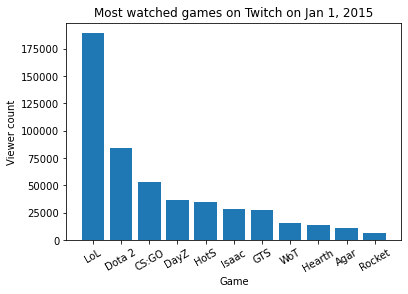

In [7]:
# Plot barchart of top viewed games
import matplotlib.pyplot as plt

x = ['LoL', 'Dota 2', 'CS:GO', 'DayZ', 'HotS', 'Isaac', 'GTS', 'WoT', 'Hearth', 'Agar', 'Rocket']
y = twitch_top_games['view_count']

ax = plt.subplot()
plt.bar(range(len(x)), y)
plt.title('Most watched games on Twitch on Jan 1, 2015')
plt.ylabel('Viewer count')
plt.xlabel('Game')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation = 30)

In [8]:
# Next, we want to analyse the breakdown of viewers by which country they are from
twitch_views.country.value_counts()

US    184597
RU     29250
TW     29219
DE     28993
CA     26733
       ...  
SM         1
MP         1
YE         1
TJ         1
SN         1
Name: country, Length: 166, dtype: int64

In [10]:
# We perform groupby on the data by 'country' and clean it
twitch_views_by_country = twitch_views.groupby('country').login.count().reset_index()
twitch_views_by_country.sort_values('login', ascending=False, inplace=True)
twitch_views_by_country.rename(columns={'login': 'view_count'}, inplace=True)
print(twitch_views_by_country.head(10))

    country  view_count
155      US      184597
134      RU       29250
153      TW       29219
37       DE       28993
27       CA       26733
52       GB       21815
138      SE       12468
125      PL        9990
151      TR        9195
23       BR        7580


[Text(0, 0.5, 'Viewer count'),
 Text(0.5, 0, 'Country'),
 Text(0.5, 1.0, 'Viewer count by country')]

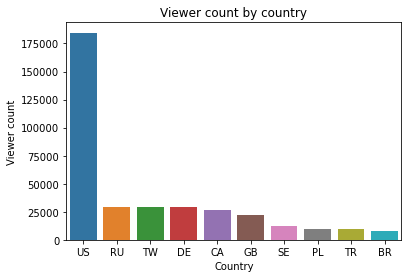

In [11]:
# Select the largest countries for visualisation
twitch_views_by_country_largest = twitch_views_by_country[twitch_views_by_country['view_count'] >= 7580]

# Plot barchart using seaborn this time
import seaborn as sns

ax = sns.barplot(data=twitch_views_by_country_largest, x='country', y='view_count')
ax.set(xlabel='Country', ylabel='Viewer count', title='Viewer count by country')

In [12]:
# A lot of viewers are coming from the United States.
# Now, let's see how many viewers are coming from Singapore.
twitch_views_in_SG = twitch_views_by_country[twitch_views_by_country['country'] == 'SG']
print(twitch_views_in_SG)

    country  view_count
139      SG        1597


In [13]:
# Next, we try to answer: Does the trend of most popular games viewed on Twitch differ for viewers from Singapore?
# We filter the twitch_views data by country = 'SG' and groupby on 'game'
twitch_views_SG = twitch_views[twitch_views['country'] == 'SG']
twitch_views_SG_by_game = twitch_views_SG.groupby('game').login.count().reset_index()
twitch_views_SG_by_game.sort_values('login', ascending=False, inplace=True)
twitch_views_SG_by_game.rename(columns={'login': 'view_count'}, inplace=True)
twitch_views_SG_by_game.head(10)

,game,view_count
4,Dota 2,875
8,League of Legends,543
3,DayZ,56
7,Heroes of the Storm,42
2,Counter-Strike: Global Offensive,20
6,Hearthstone: Heroes of Warcraft,17
10,The Binding of Isaac: Rebirth,14
0,ARK: Survival Evolved,7
1,Agar.io,7
5,Gaming Talk Shows,7


In [14]:
# Rename games with low viewer count as 'Others' and groupby on 'game' again
twitch_views_SG_by_game.loc[twitch_views_SG_by_game['view_count'] < 14, 'game'] = 'Others'
twitch_views_SG_by_game_2 = twitch_views_SG_by_game.groupby('game').view_count.sum().reset_index()
twitch_views_SG_by_game_2.sort_values('view_count', ascending=False, inplace=True)
twitch_views_SG_by_game_2

,game,view_count
2,Dota 2,875
5,League of Legends,543
1,DayZ,56
4,Heroes of the Storm,42
6,Others,28
0,Counter-Strike: Global Offensive,20
3,Hearthstone: Heroes of Warcraft,17
7,The Binding of Isaac: Rebirth,14


In [15]:
# The SG data is prepared, we now do the same for the world data.
twitch_views_by_game.head(15)

,game,view_count
23,League of Legends,189416
14,Dota 2,84180
10,Counter-Strike: Global Offensive,53408
11,DayZ,36888
22,Heroes of the Storm,34954
34,The Binding of Isaac: Rebirth,28539
17,Gaming Talk Shows,27879
39,World of Tanks,15820
20,Hearthstone: Heroes of Warcraft,14083
1,Agar.io,11298


In [16]:
# Rename games with low viewer count as 'Others' and groupby on 'game' again
twitch_views_by_game.loc[twitch_views_by_game['view_count'] < 11298, 'game'] = 'Others'
twitch_views_by_game_2 = twitch_views_by_game.groupby('game').view_count.sum().reset_index()
twitch_views_by_game_2.sort_values('view_count', ascending=False, inplace=True)
twitch_views_by_game_2.head(15)

,game,view_count
7,League of Legends,189416
3,Dota 2,84180
1,Counter-Strike: Global Offensive,53408
2,DayZ,36888
6,Heroes of the Storm,34954
9,The Binding of Isaac: Rebirth,28539
4,Gaming Talk Shows,27879
8,Others,16190
10,World of Tanks,15820
5,Hearthstone: Heroes of Warcraft,14083


Text(0.5, 1.0, 'Twitch viewers in Singapore by game')

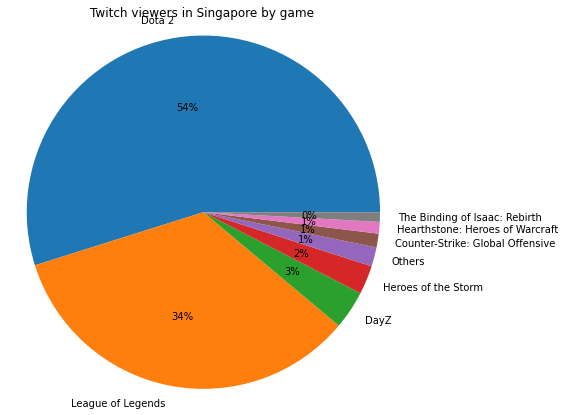

In [17]:
# Plot the piechart for the SG viewers
plt.figure(figsize=(7,7))
plt.pie(twitch_views_SG_by_game_2['view_count'], labels=twitch_views_SG_by_game_2['game'], autopct='%d%%')
plt.axis('equal')
plt.title("Twitch viewers in Singapore by game")

Text(0.5, 1.0, 'Twitch viewers in world by game')

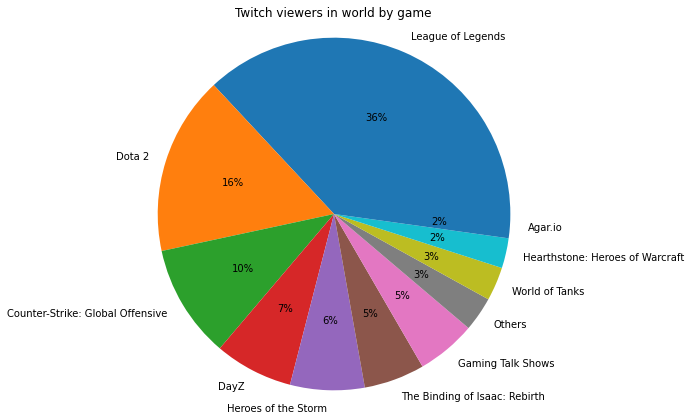

In [18]:
# Plot the piechart for the world viewers
plt.figure(figsize=(7,7))
plt.pie(twitch_views_by_game_2['view_count'], labels=twitch_views_by_game_2['game'], autopct='%d%%')
plt.axis('equal')
plt.title("Twitch viewers in world by game")

In [ ]:
# Singapore is interested in generally the same games compared to the rest of the world, but the proportion is different.
# For instance, Dota 2 is the most popular in SG while League of Legends is the most popular overall in the world.
# Also, there is more diversity of games people watch in the world while in SG 88% of people are mainly interested 
# in Dota 2 and LoL.

In [19]:
# The next part of the project we try to investigate the trend of viewership count during the day
twitch_views.head()

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,NaN,NaN
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,False
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,False
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,False


In [20]:
# Using string slicing to obtain the hour from 'time'
twitch_views['hour'] = twitch_views['time'].str[11:13]
twitch_views.head()

,time,device_id,login,channel,country,player,game,stream_format,subscriber,hour
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,NaN,NaN,18
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,False,23
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False,04
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,False,11
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,False,11


In [21]:
# Groupby by 'hour' for world data
twitch_views_by_hour = twitch_views.groupby('hour').login.count().reset_index()
twitch_views_by_hour.sort_values('hour', ascending=True, inplace=True)
twitch_views_by_hour.rename(columns={'login': 'view_count'}, inplace=True)
twitch_views_by_hour

,hour,view_count
0,00,14990
1,01,14148
2,02,23818
3,03,15848
4,04,14796
5,05,6137
6,06,1397
7,07,8349
8,08,11106
9,09,9734


In [22]:
# Groupby by 'hour' for SG data
twitch_views_SG = twitch_views[twitch_views['country'] == 'SG']
twitch_views_SG_by_hour = twitch_views_SG.groupby('hour').login.count().reset_index()
twitch_views_SG_by_hour.sort_values('hour', ascending=True, inplace=True)
twitch_views_SG_by_hour.rename(columns={'login': 'view_count'}, inplace=True)
twitch_views_SG_by_hour

,hour,view_count
0,00,46
1,01,40
2,02,84
3,03,58
4,04,82
5,05,50
6,06,9
7,07,6
8,08,19
9,09,10


In [23]:
# Groupby by 'hour' for US data, using US here as well since a large percentage of viewers are from US
twitch_views_US = twitch_views[twitch_views['country'] == 'US']
twitch_views_US_by_hour = twitch_views_US.groupby('hour').login.count().reset_index()
twitch_views_US_by_hour.sort_values('hour', ascending=True, inplace=True)
twitch_views_US_by_hour.rename(columns={'login': 'view_count'}, inplace=True)
twitch_views_US_by_hour

,hour,view_count
0,00,6734
1,01,4547
2,02,5828
3,03,4085
4,04,3422
5,05,1549
6,06,214
7,07,318
8,08,912
9,09,1158


Text(0.5, 0, 'Hour')

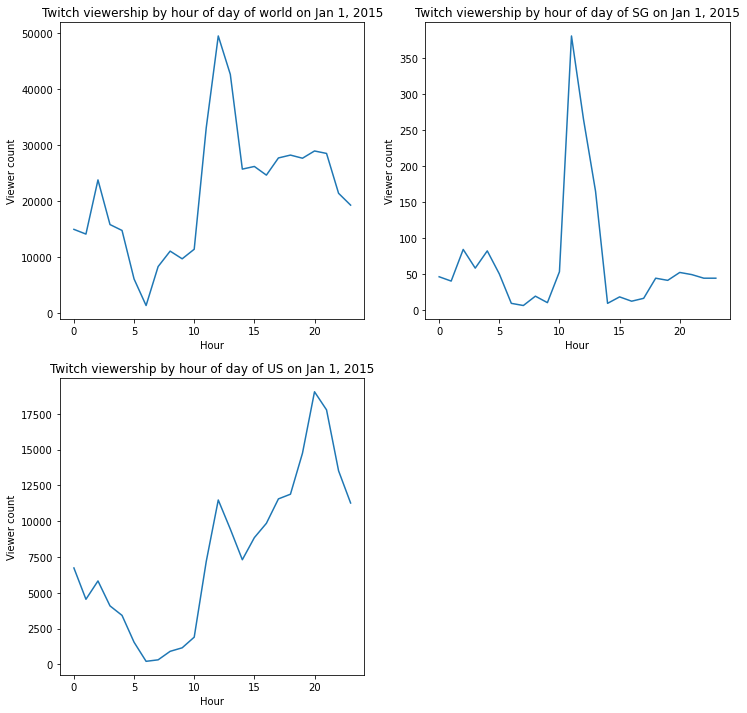

In [24]:
# Plotting time series graphs for the three seperate data
x = range(24)
y1 = twitch_views_by_hour['view_count']
y2 = twitch_views_SG_by_hour['view_count']
y3 = twitch_views_US_by_hour['view_count']

plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.plot(x, y1)
plt.title('Twitch viewership by hour of day of world on Jan 1, 2015')
plt.ylabel('Viewer count')
plt.xlabel('Hour')

plt.subplot(2,2,2)
plt.plot(x, y2)
plt.title('Twitch viewership by hour of day of SG on Jan 1, 2015')
plt.ylabel('Viewer count')
plt.xlabel('Hour')

plt.subplot(2,2,3)
plt.plot(x, y3)
plt.title('Twitch viewership by hour of day of US on Jan 1, 2015')
plt.ylabel('Viewer count')
plt.xlabel('Hour')

In [25]:
# Twitch viewership hits the highest viewer count at 12 noon for world. 
# Similar trend is noted in Singapore, but surprisingly not in the US, where the spike is at 2000 hours.
# Let's investigate which country / game is contributing to this viewership spike for world and Singapore.
# We filtered the data for views from 1100 to 1300.
twitch_views_at_noon = twitch_views[(twitch_views['hour'] == '11') | (twitch_views['hour'] == '12') | (twitch_views['hour'] == '13')]
twitch_views_at_noon.hour.value_counts()

12    49516
13    42664
11    33134
Name: hour, dtype: int64

In [26]:
# Country breakdown of viewers at peak viewership
twitch_views_at_noon.country.value_counts()

US    28117
DE     9677
RU     9360
GB     7058
CA     5414
      ...  
BM        1
BZ        1
KN        1
TJ        1
GL        1
Name: country, Length: 144, dtype: int64

In [27]:
# Game breakdown of game popularity at peak viewership
twitch_views_at_noon.game.value_counts()

Dota 2                              67781
Counter-Strike: Global Offensive    41586
Heroes of the Storm                  8431
World of Tanks                       2713
Hearthstone: Heroes of Warcraft      2534
League of Legends                     909
ARK: Survival Evolved                 603
The Binding of Isaac: Rebirth         121
Agar.io                               114
Fallout 3                              78
Gaming Talk Shows                      39
Batman: Arkham Knight                  26
Breaking Point                         22
The Witcher 3: Wild Hunt               18
Reign Of Kings                         12
Mortal Kombat X                         5
Super Mario Bros.                       4
Block N Load                            3
Devil May Cry 4: Special Edition        3
Depth                                   2
H1Z1                                    1
Hektor                                  1
Choice Chamber                          1
Senran Kagura: Estival Versus     

In [33]:
# Interesting trend, but let's groupby the dataset by 'game' and clean it first
twitch_views_at_noon_by_game = twitch_views_at_noon.groupby('game').login.count().reset_index()
twitch_views_at_noon_by_game.sort_values('login', ascending=False, inplace=True)
twitch_views_at_noon_by_game.rename(columns={'login': 'view_count'}, inplace=True)
# Replace games with low view counts as 'Others'
twitch_views_at_noon_by_game.loc[twitch_views_at_noon_by_game['view_count'] < 909, 'game'] = 'Others'
twitch_views_at_noon_by_game_2 = twitch_views_at_noon_by_game.groupby('game').view_count.sum().reset_index()
twitch_views_at_noon_by_game_2.sort_values('view_count', ascending=False, inplace=True)
twitch_views_at_noon_by_game_2

,game,view_count
1,Dota 2,67781
0,Counter-Strike: Global Offensive,41586
3,Heroes of the Storm,8431
6,World of Tanks,2713
2,Hearthstone: Heroes of Warcraft,2534
5,Others,1054
4,League of Legends,909


Text(0.5, 1.0, 'Twitch viewers in world by game from 11am to 1pm')

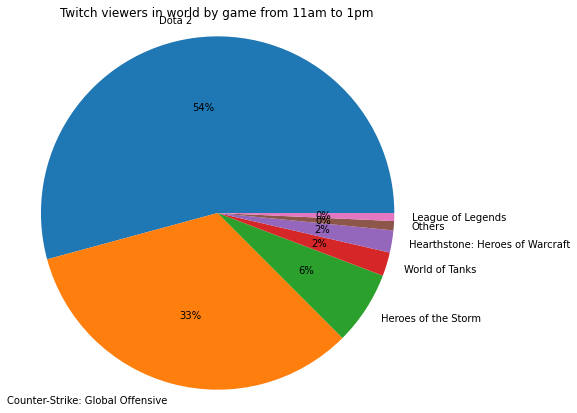

In [35]:
# Plot the piechart for the world viewers
plt.figure(figsize=(7,7))
plt.pie(twitch_views_at_noon_by_game_2['view_count'], labels=twitch_views_at_noon_by_game_2['game'], autopct='%d%%')
plt.axis('equal')
plt.title("Twitch viewers in world by game from 11am to 1pm")

In [30]:
# It appears the spike in game viewership at noon time was driven by Dota 2 and Counter-Strike (87% of views).
# Surprisingly, the most popular game for the day League of Legends was not popular at this time (less than 1% of views)
# This also explains why Singapore had a similar spike in viewership at noon time 
# since from our observation earlier we know Dota 2 is popular in Singapore.